### Урок 3. Классификация. Логистическая регрессия.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [4]:
X

array([[   1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,
           1.],
       [   1.,    1.,    2.,    5.,    3.,    0.,    5.,   10.,    1.,
           2.],
       [ 500.,  700.,  750.,  600., 1450.,  800., 1500., 2000.,  450.,
        1000.],
       [   1.,    1.,    2.,    1.,    2.,    1.,    3.,    3.,    1.,
           2.]])

In [5]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [6]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [7]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [8]:
X_st

array([[ 1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ],
       [ 1.   ,  1.   ,  2.   ,  5.   ,  3.   ,  0.   ,  5.   , 10.   ,
         1.   ,  2.   ],
       [-0.98 , -0.567, -0.464, -0.773,  0.98 , -0.361,  1.083,  2.114,
        -1.083,  0.052],
       [ 1.   ,  1.   ,  2.   ,  1.   ,  2.   ,  1.   ,  3.   ,  3.   ,
         1.   ,  2.   ]])

### Функцию изменяем с помощью проверки данных в цикле по всем элементам:

In [9]:
def calc_logloss(y, y_pred):
    
# Проверка на корректность данных и необходимое изменение
    for i in range(len(y_pred)):
        if y_pred[i] == 0:
            y_pred[i] = 0.1
        elif y_pred[i] == 1:
            y_pred[i] = 0.9
        else:
            y_pred[i] = y_pred[i]
    
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

In [10]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

### Пример с некорректными данными (0 и 1):

In [11]:
# Пример с некорректными данными
y1 = np.array([1, 0])
y_pred1 = np.array([1.0, 0.0])
calc_logloss(y1, y_pred1)

0.10536051565782628

In [12]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [13]:
z = np.linspace(-10, 10, 101)
z

array([-10. ,  -9.8,  -9.6,  -9.4,  -9.2,  -9. ,  -8.8,  -8.6,  -8.4,
        -8.2,  -8. ,  -7.8,  -7.6,  -7.4,  -7.2,  -7. ,  -6.8,  -6.6,
        -6.4,  -6.2,  -6. ,  -5.8,  -5.6,  -5.4,  -5.2,  -5. ,  -4.8,
        -4.6,  -4.4,  -4.2,  -4. ,  -3.8,  -3.6,  -3.4,  -3.2,  -3. ,
        -2.8,  -2.6,  -2.4,  -2.2,  -2. ,  -1.8,  -1.6,  -1.4,  -1.2,
        -1. ,  -0.8,  -0.6,  -0.4,  -0.2,   0. ,   0.2,   0.4,   0.6,
         0.8,   1. ,   1.2,   1.4,   1.6,   1.8,   2. ,   2.2,   2.4,
         2.6,   2.8,   3. ,   3.2,   3.4,   3.6,   3.8,   4. ,   4.2,
         4.4,   4.6,   4.8,   5. ,   5.2,   5.4,   5.6,   5.8,   6. ,
         6.2,   6.4,   6.6,   6.8,   7. ,   7.2,   7.4,   7.6,   7.8,
         8. ,   8.2,   8.4,   8.6,   8.8,   9. ,   9.2,   9.4,   9.6,
         9.8,  10. ])

In [14]:
probabilities = sigmoid(z)

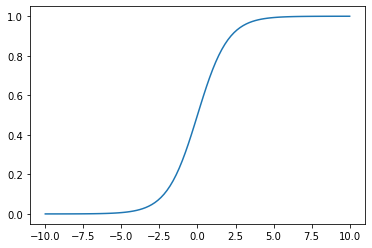

In [15]:
plt.plot(z, probabilities)
plt.show()

Logistic Regression

### Изменяем функцию, чтобы печатался только конечный результат:

In [16]:
def eval_model(X, y, iterations, alpha):
    
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        
#         if i % (iterations / 10) == 0:
#             print(f'{i}, {W}, err: {err}')
    print(f'iter: {iterations}, alpha: {alpha}, err: {err}')
    return W

### Путем перебора выявляем лучшие значения аргументов функции:

In [17]:
iterations = [2000, 2500, 3000, 3500, 4000, 4500, 5000]
alpha = [10, 5, 1, 1e-1, 1e-2]

for i in range(len(iterations)):
    for j in range(len(alpha)):
        W = eval_model(X_st, y, iterations[i], alpha[j])

iter: 2000, alpha: 10, err: 0.13041609719676558
iter: 2000, alpha: 5, err: 0.09829902938584982
iter: 2000, alpha: 1, err: 0.19320475766652623
iter: 2000, alpha: 0.1, err: 0.32666561318308307
iter: 2000, alpha: 0.01, err: 0.4571714465185407
iter: 2500, alpha: 10, err: 0.31028271141960573
iter: 2500, alpha: 5, err: 0.09417749771601644
iter: 2500, alpha: 1, err: 0.18057234210312667
iter: 2500, alpha: 0.1, err: 0.3116463738712617
iter: 2500, alpha: 0.01, err: 0.44932701037767436
iter: 3000, alpha: 10, err: 0.14002001867077135
iter: 3000, alpha: 5, err: 0.09069988310480306
iter: 3000, alpha: 1, err: 0.1704004680170605
iter: 3000, alpha: 0.1, err: 0.29993943858464905
iter: 3000, alpha: 0.01, err: 0.4421983321401105
iter: 3500, alpha: 10, err: 0.20344628358575534
iter: 3500, alpha: 5, err: 0.08768861724274771
iter: 3500, alpha: 1, err: 0.16201619735333897
iter: 3500, alpha: 0.1, err: 0.29045869781290035
iter: 3500, alpha: 0.01, err: 0.4356118658295289
iter: 4000, alpha: 10, err: 0.13166089620

### После перебора видно, что минимальный err получается при iter - 5000, alpha - 5.

### В силу того, что мы имеем небольшое количество признаков, небольшое количество наблюдений и используем стандартизацию, вероятность переобучения модели невысокая. 

## Д/з

1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.
2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).
4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).
5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
6. Могла ли модель переобучиться? Почему?